In [52]:
import time 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [4]:
t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  1.3200860023498535


/Users/fujikinakamura/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


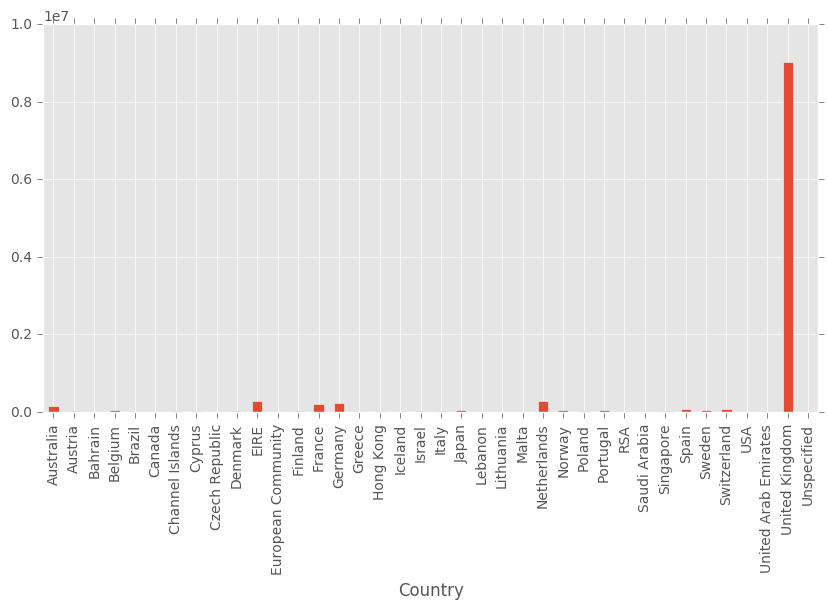

In [8]:
# 各国の売上
# NOTE:
# やはり UK は多い。

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.show()

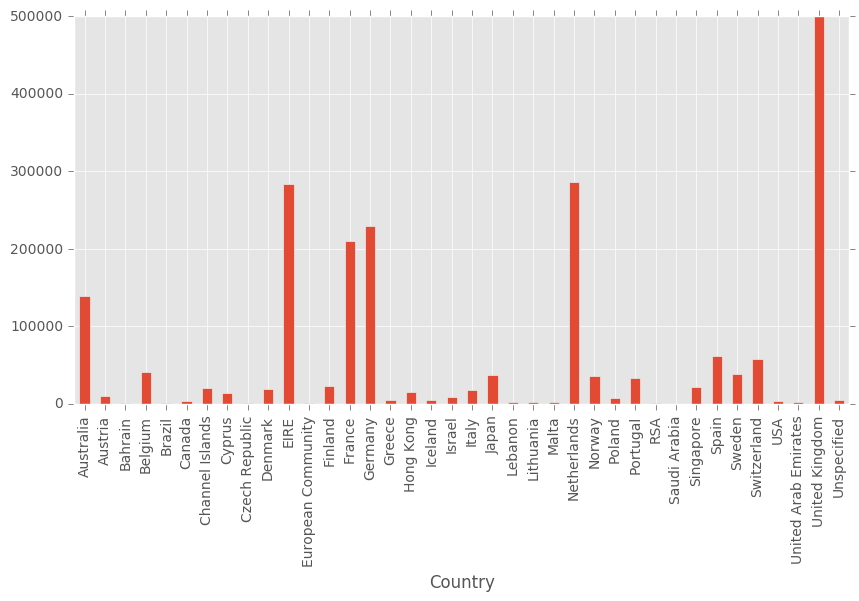

In [10]:
# 各国の売上, UK 以外
# NOTE:
# France, Germany はトランザクション数が多いが売上はそれほどは高くない。
# つまり、1トランザクションあたりの平均売上は小さい。

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.ylim(0, 500000)
plt.show()

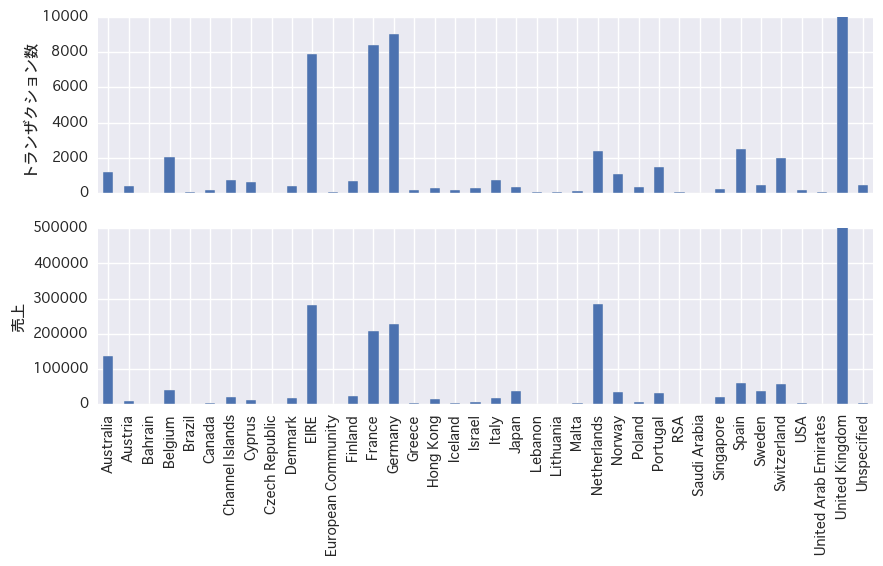

In [104]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

# 上段: トランザクション数
df_sales.groupby('Country').size().plot(kind='bar', ax=ax1)
ax1.set_ylim(0, 10000)
ax1.set_xlabel('')
ax1.set_ylabel('トランザクション数')

# 下段: 売上
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', ax=ax2)
ax2.set_ylim(0, 500000)
ax2.set_xlabel('')
ax2.set_ylabel('売上')

plt.savefig('国別_総トランザクション数_総売上.png')
plt.show()

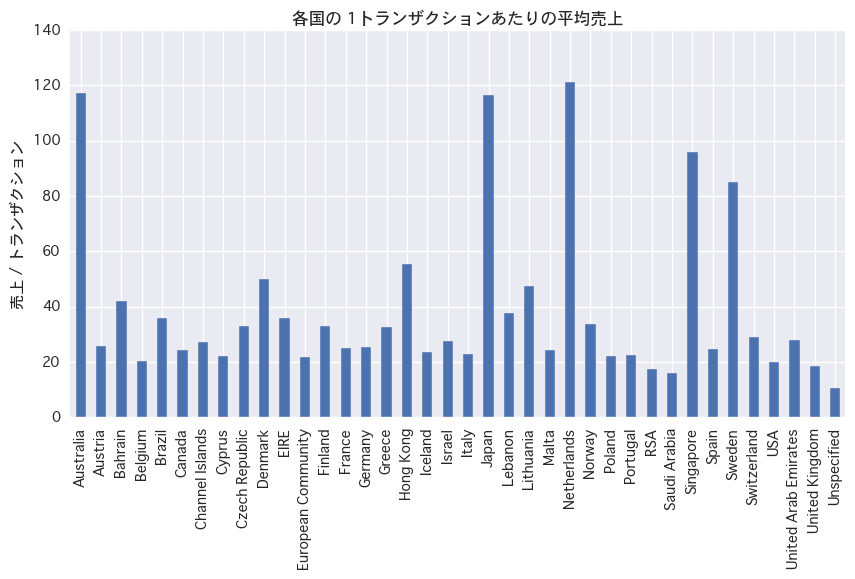

In [85]:
# 各国の 1トランザクションあたりの平均売上

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].mean().plot(kind='bar', figsize=figsize)
plt.title('各国の 1トランザクションあたりの平均売上')
plt.xlabel('')
plt.ylabel('売上 / トランザクション')
plt.show()

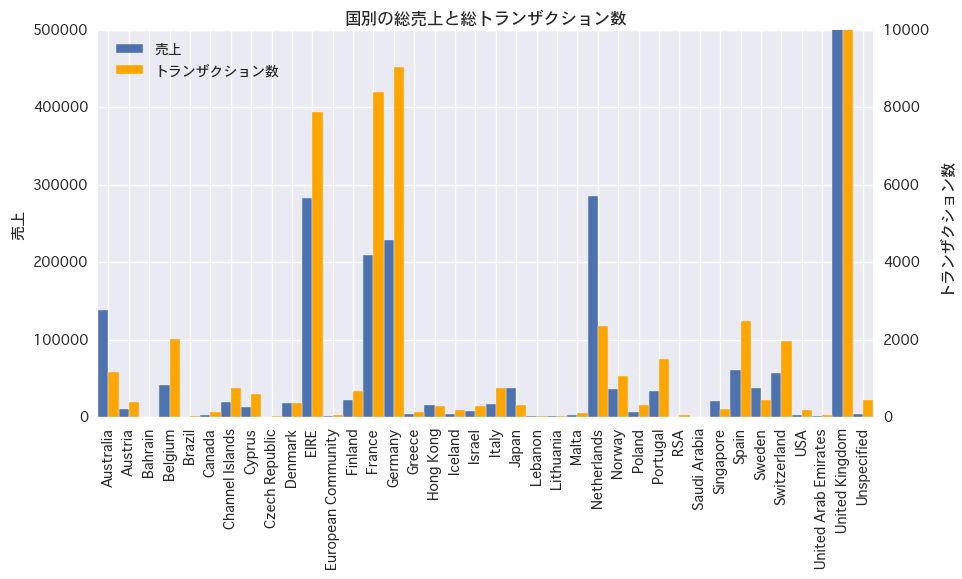

In [82]:
# NOTE: 
# このプロットはよくない。
# Bar plot を 2つ横に並べるのは、前年 / 当年の比較とかであればよさそう。

# 売上

figsize = (10, 5)
fig, ax = plt.subplots(figsize=figsize)

ind = np.arange(df_sales['Country'].nunique())
w = 0.5
countries = df_sales.groupby('Country').size().index

#df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize, ax=ax, x=ind, width=w)
rect1 = ax.bar(ind, df_sales.groupby(['Country'])['Sales'].sum(), width=w)
ax.set_ylim(0, 500000)
ax.set_ylabel('売上')

# トランザクション数
ax2 = ax.twinx()
#df_sales.groupby('Country').size().plot(kind='bar', figsize=figsize, ax=ax2, x=ind + w, width=w, color='orange')
rect2 = ax2.bar(ind + w, df_sales.groupby('Country').size(), width=w, color='orange')
ax2.set_ylim(0, 10000)
ax2.set_ylabel('トランザクション数')
ax2.grid(b=False)

ax.set_xlim(0, len(ind))
ax.set_xticks(ind + w)
ax.set_xticklabels(countries, rotation=90)

ax.legend((rect1[0], rect2[0]), ('売上', 'トランザクション数'), bbox_to_anchor=(0.25, 1))
ax.set_title('国別の総売上と総トランザクション数')

plt.show()

In [6]:
df_sales.groupby(['Country', 'CustomerID'])['Sales'].sum()

Country         CustomerID
Australia       12386.0          401.90
                12388.0         2780.66
                12393.0         1582.60
                12415.0       124914.53
                12422.0          386.20
                12424.0         1760.96
                12431.0         5514.67
                12434.0          806.14
                16321.0          373.65
Austria         12358.0         1168.06
                12360.0         2662.06
                12370.0          277.20
                12373.0          364.60
                12374.0          742.93
                12414.0          562.41
                12429.0          437.98
                12453.0          707.09
                12817.0          166.04
                12818.0         1542.08
                12865.0         1568.23
Bahrain         12353.0           89.00
                12355.0          459.40
Belgium         12361.0          189.90
                12362.0         5226.23
             